In [13]:
import pandas as pd
import math
import os
import os.path
import time
from bitmex import bitmex
from datetime import timedelta, datetime
from dateutil import parser
from tqdm import tqdm_notebook


In [14]:
# %export $PATH

In [15]:
bitmex_api_key = 'xH5UxDrd6F2S2gkEU49_fUPy'
bitmex_api_secret = 'wm4T94sneODNwoK-XjGpnn8EAQ3dXxl7T9dx3R20P4P1Sqxb'

In [16]:
# bitmex_api_key = os.environ.get('APIKEY')
# bitmex_api_secret = os.environ.get('SECRETAPIKEY')

In [17]:
binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750
bitmex_client = bitmex(test=False, api_key=bitmex_api_key, api_secret=bitmex_api_secret)

/Users/ar9av/Work/NER-NEL/glot/lib/python3.7/site-packages/swagger_spec_validator/validator20.py:53: SwaggerValidationWarning: Found "$ref: #/definitions/UserPreferences" with siblings that will be overwritten. See https://stackoverflow.com/a/48114924 for more information. (path #/definitions/User/properties/preferences)
  ref_dict['$ref'], '/'.join(path),


In [18]:
def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "bitmex": old = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=False).result()[0][0]['timestamp']
    if source == "bitmex": new = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=True).result()[0][0]['timestamp']
    return old, new

In [80]:
def get_all_bitmex(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "bitmex")
    delta_min = (newest_point - oldest_point).total_seconds()/60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    rounds = math.ceil(available_data / batch_size)
    if rounds > 0:
        print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data in %d rounds.' % (delta_min, symbol, available_data, kline_size, rounds))
        for round_num in tqdm_notebook(range(rounds)):
            time.sleep(1)
            new_time = (oldest_point + timedelta(minutes = round_num * batch_size * binsizes[kline_size]))
            data = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=batch_size, startTime = new_time).result()[0]
            temp_df = pd.DataFrame(data)
            data_df = data_df.append(temp_df)
    # data_df.set_index('timestamp', inplace=True)
    if save and rounds > 0: data_df.to_csv(os.path.join('data',filename))
    print('All caught up..!')
    return data_df

In [81]:
df = get_all_bitmex("ETHUSD", "1d", save = True)

All caught up..!


In [79]:
datetime.date(2018, 12, 12)

datetime.date(2018, 12, 12)

In [78]:
parser.parse(df['timestamp'].iloc[0])

datetime.datetime(2018, 8, 3, 0, 0, tzinfo=tzutc())

In [47]:
df = pd.read_csv('ETHUSD-1d-data.csv')

In [82]:
df.head(10)

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional
0,2018-08-03 00:00:00+00:00,ETHUSD,400.00,435.50,400.00,410.80,10715,4419143,412.01,140,182070416190,33347.037633,1.373940e+07
1,2018-08-04 00:00:00+00:00,ETHUSD,410.80,422.10,397.00,417.70,10589,8074096,411.39,500,332155950205,59877.166782,2.463439e+07
2,2018-08-05 00:00:00+00:00,ETHUSD,417.70,419.50,402.10,407.05,7100,6178493,411.51,6451,254246485890,44804.196116,1.844258e+07
3,2018-08-06 00:00:00+00:00,ETHUSD,407.05,413.50,400.50,409.15,6375,4235913,407.13,466,172456149165,29649.988790,1.207187e+07
4,2018-08-07 00:00:00+00:00,ETHUSD,409.15,413.50,397.00,405.60,9179,6122651,406.28,52,248745460735,42678.094654,1.734091e+07
5,2018-08-08 00:00:00+00:00,ETHUSD,405.60,412.00,368.95,378.70,16469,12590581,390.64,502,491825973690,86765.444811,3.391540e+07
6,2018-08-09 00:00:00+00:00,ETHUSD,378.70,381.20,344.00,356.05,28794,26465774,363.24,2060,961326817860,169672.509726,6.165310e+07
7,2018-08-10 00:00:00+00:00,ETHUSD,356.05,369.75,351.05,363.35,17186,11906454,361.50,1,430413062300,76216.607669,2.755671e+07
8,2018-08-11 00:00:00+00:00,ETHUSD,363.35,365.55,324.45,331.75,17011,14579999,348.36,250,507902174385,91862.200220,3.203374e+07
9,2018-08-12 00:00:00+00:00,ETHUSD,331.75,333.00,304.40,317.00,30293,37598328,318.53,1390,1197608417710,233462.419292,7.438868e+07


In [83]:
def get_day(date):
    year, month, day  = (int(x) for x in (date.split('T')[0]).split('-')) 
    ans = datetime.date(year, month, day)
    return ans.strftime("%A")

In [84]:
import datetime

In [85]:
from dateutil import parser
df['timestamp'] = df.timestamp.apply(lambda x: parser.parse(x))
df = df.set_index('timestamp')
df2 = df
# df2 = df.resample('D').mean()
df2['day'] = [get_day(str(x)) for x in df2.index.values]

In [86]:
df2

,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,day
timestamp,,,,,,,,,,,,,
2018-08-03 00:00:00+00:00,ETHUSD,400.00,435.50,400.00,410.80,10715,4419143,412.01,140,182070416190,33347.037633,1.373940e+07,Friday
2018-08-04 00:00:00+00:00,ETHUSD,410.80,422.10,397.00,417.70,10589,8074096,411.39,500,332155950205,59877.166782,2.463439e+07,Saturday
2018-08-05 00:00:00+00:00,ETHUSD,417.70,419.50,402.10,407.05,7100,6178493,411.51,6451,254246485890,44804.196116,1.844258e+07,Sunday
2018-08-06 00:00:00+00:00,ETHUSD,407.05,413.50,400.50,409.15,6375,4235913,407.13,466,172456149165,29649.988790,1.207187e+07,Monday
2018-08-07 00:00:00+00:00,ETHUSD,409.15,413.50,397.00,405.60,9179,6122651,406.28,52,248745460735,42678.094654,1.734091e+07,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-02 00:00:00+00:00,ETHUSD,2708.35,2743.45,2528.50,2637.15,77543,3301015,2608.47,23,861057564800,120609.429130,3.146781e+08,Wednesday
2021-06-03 00:00:00+00:00,ETHUSD,2637.15,2805.90,2552.15,2708.60,76493,3231384,2708.08,53,875083591095,120738.321385,3.270498e+08,Thursday
2021-06-04 00:00:00+00:00,ETHUSD,2708.60,2893.85,2660.00,2858.00,81560,3583608,2801.60,33,1003980681825,138280.119705,3.875144e+08,Friday


In [53]:
subset = df2[df2.day.isin(['Sunday', 'Thursday'])]

In [57]:
subset
sub2 = subset
sub2['avg'] = (sub2.high + sub2.low)/2

/Users/ar9av/Work/NER-NEL/glot/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [58]:
sub2

,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,day,avg
timestamp,,,,,,,,,,,,,,
2018-08-05 00:00:00+00:00,ETHUSD,417.70,419.50,402.10,407.05,7100,6178493,411.51,6451,254246485890,44804.196116,1.844258e+07,Sunday,410.800
2018-08-09 00:00:00+00:00,ETHUSD,378.70,381.20,344.00,356.05,28794,26465774,363.24,2060,961326817860,169672.509726,6.165310e+07,Thursday,362.600
2018-08-12 00:00:00+00:00,ETHUSD,331.75,333.00,304.40,317.00,30293,37598328,318.53,1390,1197608417710,233462.419292,7.438868e+07,Sunday,318.700
2018-08-16 00:00:00+00:00,ETHUSD,278.60,305.85,274.10,280.15,70585,109913113,287.74,2475,3162566169900,699286.538948,2.012752e+08,Thursday,289.975
2018-08-19 00:00:00+00:00,ETHUSD,317.40,321.60,282.50,294.35,59023,80133628,299.04,995,2396286809135,514388.274360,1.538877e+08,Sunday,302.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-23 00:00:00+00:00,ETHUSD,2444.65,2497.00,2160.35,2301.45,108910,4842573,2347.16,42,1136628388495,181015.938626,4.251093e+08,Sunday,2328.675
2021-05-27 00:00:00+00:00,ETHUSD,2715.00,2915.90,2656.00,2891.20,100011,4660007,2793.10,1,1301582422740,183121.022124,5.116271e+08,Thursday,2785.950
2021-05-30 00:00:00+00:00,ETHUSD,2416.60,2582.00,2213.90,2281.00,83241,3499910,2375.93,27,831552531525,122470.458018,2.912829e+08,Sunday,2397.950


In [150]:
subset2 = subset.drop('day', axis = 1).iloc[::-1]

In [151]:
sub2 = subset2

In [152]:
sub2['day'] = [get_day(str(x)) for x in sub2.index.values]

In [153]:
sub2['avg'] = (sub2.high + sub2.low)/2

In [154]:
sub2

,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,day,avg
timestamp,,,,,,,,,,,,,
2021-06-06 00:00:00+00:00,2673.192500,2678.942000,2669.373000,2674.084000,188.910000,8484.760000,2674.373000,37.020000,2.269979e+09,305.501911,8.173637e+05,Sunday,2674.157500
2021-06-03 00:00:00+00:00,2798.464757,2804.509201,2792.420486,2798.936285,283.527778,12478.638889,2798.491840,34.892361,3.495440e+09,481.449617,1.348993e+06,Thursday,2798.464844
2021-05-30 00:00:00+00:00,2382.269965,2389.786111,2375.666493,2382.657292,270.847222,10674.944444,2382.827292,25.614583,2.537012e+09,378.008079,8.989302e+05,Sunday,2382.726302
2021-05-27 00:00:00+00:00,2771.015972,2779.500868,2762.400000,2770.571181,273.597222,11334.878472,2770.948681,35.840278,3.133854e+09,438.671637,1.213291e+06,Thursday,2770.950434
2021-05-23 00:00:00+00:00,2107.311458,2121.617882,2092.647049,2106.677257,516.822917,31120.715278,2106.923090,43.875000,6.287584e+09,1061.080376,2.149423e+06,Sunday,2107.132465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-16 00:00:00+00:00,287.842361,288.486806,287.226562,287.861632,150.767361,227180.517361,287.865278,935.625000,6.544476e+09,1441.338624,4.152814e+05,Thursday,287.856684
2018-08-12 00:00:00+00:00,321.497222,321.994792,321.066667,321.493750,59.152778,60652.888889,321.538924,744.173611,1.947856e+09,381.761247,1.226078e+05,Sunday,321.530729
2018-08-09 00:00:00+00:00,361.161285,361.635590,360.769965,361.194792,59.885417,41638.465278,361.222326,702.479167,1.504933e+09,266.473765,9.632806e+04,Thursday,361.202778


In [155]:
sub2.head(40)

,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional,day,avg
timestamp,,,,,,,,,,,,,
2021-06-06 00:00:00+00:00,2673.192500,2678.942000,2669.373000,2674.084000,188.910000,8484.760000,2674.373000,37.020000,2.269979e+09,305.501911,8.173637e+05,Sunday,2674.157500
2021-06-03 00:00:00+00:00,2798.464757,2804.509201,2792.420486,2798.936285,283.527778,12478.638889,2798.491840,34.892361,3.495440e+09,481.449617,1.348993e+06,Thursday,2798.464844
2021-05-30 00:00:00+00:00,2382.269965,2389.786111,2375.666493,2382.657292,270.847222,10674.944444,2382.827292,25.614583,2.537012e+09,378.008079,8.989302e+05,Sunday,2382.726302
2021-05-27 00:00:00+00:00,2771.015972,2779.500868,2762.400000,2770.571181,273.597222,11334.878472,2770.948681,35.840278,3.133854e+09,438.671637,1.213291e+06,Thursday,2770.950434
2021-05-23 00:00:00+00:00,2107.311458,2121.617882,2092.647049,2106.677257,516.822917,31120.715278,2106.923090,43.875000,6.287584e+09,1061.080376,2.149423e+06,Sunday,2107.132465
2021-05-20 00:00:00+00:00,2695.115625,2714.867187,2676.842188,2696.140104,502.621528,25410.423611,2695.752118,45.562500,6.785174e+09,1004.807986,2.690911e+06,Thursday,2695.854688
2021-05-16 00:00:00+00:00,3702.984896,3715.526562,3691.209549,3702.744618,456.913194,21155.229167,3703.530729,34.802083,7.619512e+09,990.950554,3.573176e+06,Sunday,3703.368056
2021-05-13 00:00:00+00:00,3824.648437,3842.596701,3807.167014,3823.981250,738.763889,36625.475694,3824.537527,38.812721,1.385375e+10,1808.621153,6.844321e+06,Thursday,3824.881858
2021-05-09 00:00:00+00:00,3896.291319,3904.873958,3887.390278,3896.338715,357.364583,14859.701389,3896.188958,30.298611,5.766311e+09,859.981289,3.337484e+06,Sunday,3896.132118


In [157]:
(2674.157500 - 1253.397569)/1253.397569

1.1335269559630046

<Figure size 1440x720 with 0 Axes>

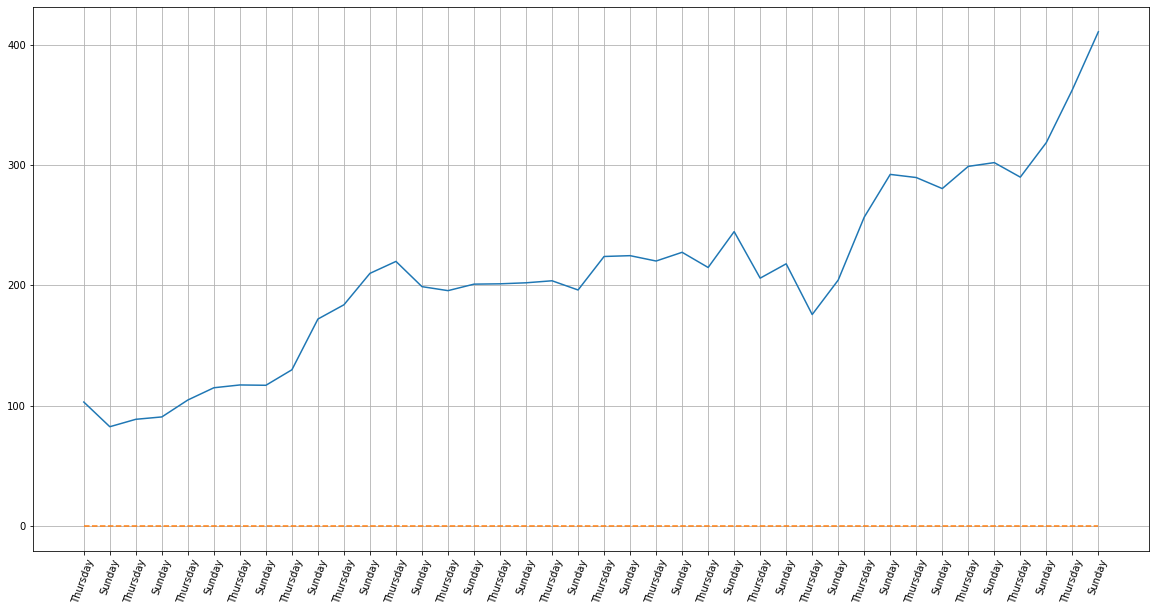

In [59]:

from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
n = 40
xs = sub2.head(n).iloc[::-1]
proj = xs.day.values
proj_x = range(len(proj))
fig = plt.figure(figsize=(20, 10))
plt.plot(proj_x, xs.avg.values)

plt.plot(proj_x, [0]*len(xs), r'--') 
plt.xticks(proj_x, proj)
degrees = 70
plt.grid()
plt.xticks(rotation=degrees)
plt.savefig('plots/eth-thursday-sunday-strat-values.png')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'Thursday'),
  Text(1, 0, 'Sunday'),
  Text(2, 0, 'Thursday'),
  Text(3, 0, 'Sunday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Sunday'),
  Text(6, 0, 'Thursday'),
  Text(7, 0, 'Sunday'),
  Text(8, 0, 'Thursday'),
  Text(9, 0, 'Sunday'),
  Text(10, 0, 'Thursday'),
  Text(11, 0, 'Sunday'),
  Text(12, 0, 'Thursday'),
  Text(13, 0, 'Sunday'),
  Text(14, 0, 'Thursday'),
  Text(15, 0, 'Sunday'),
  Text(16, 0, 'Thursday'),
  Text(17, 0, 'Sunday'),
  Text(18, 0, 'Thursday'),
  Text(19, 0, 'Sunday'),
  Text(20, 0, 'Thursday'),
  Text(21, 0, 'Sunday'),
  Text(22, 0, 'Thursday'),
  Text(23, 0, 'Sunday'),
  Text(24, 0, 'Thursday'),
  Text(25, 0, 'Sunday'),
  Text(26, 0, 'Thursday'),
  Text(27, 0, 'Sunday'),
  Text(28, 0, 'Thursday'),
  Text(29, 0, 'Sunday'),
  Text(30, 0, 'Thursday'),
  Text(31, 0, 'Su

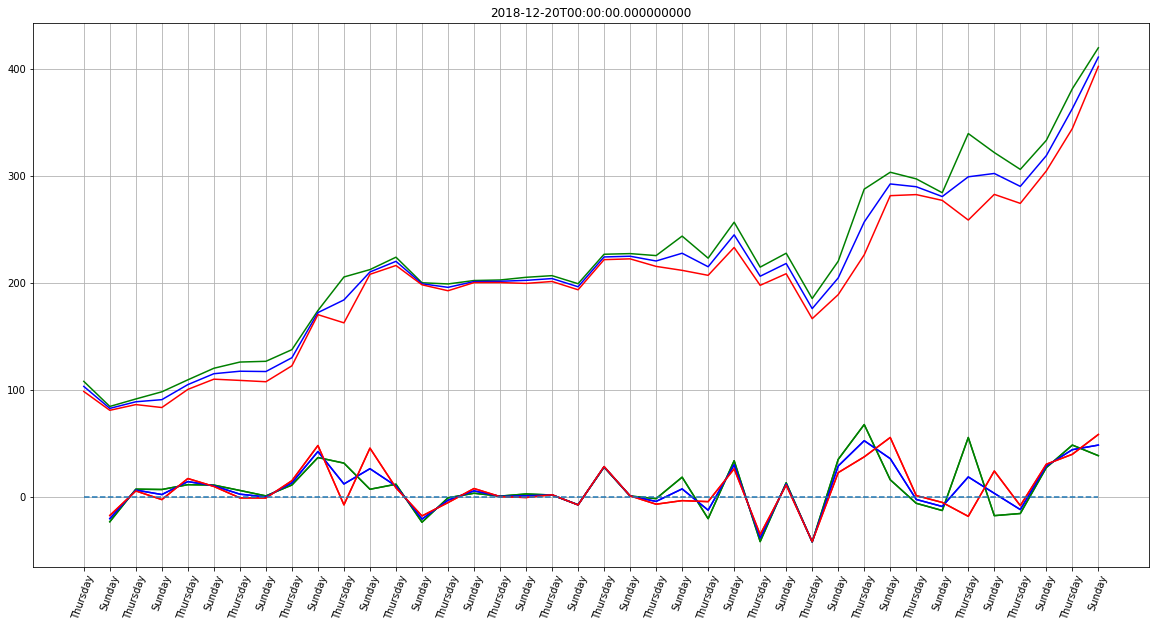

In [71]:
xs = sub2.head(40).iloc[::-1]
proj = xs.day.values
proj_x = range(len(proj))
fig = plt.figure(figsize=(20, 10))
for k in ['diff', 'pct_change', 'value']:
    if k == 'diff':
        for i in zip(['high', 'avg', 'low'], ['g', 'b', 'r']):
            plt.plot(proj_x, xs[i[0]].diff().values, i[1])
    elif k == 'pct_change':
        for i in zip(['high', 'avg', 'low'], ['g', 'b', 'r']):
            plt.plot(proj_x, xs[i[0]].diff().values, i[1])
    elif k == 'value':
        for i in zip(['high', 'avg', 'low'], ['g', 'b', 'r']):
            plt.plot(proj_x, xs[i[0]].values, i[1])
plt.plot(proj_x, [0]*len(xs), r'--') 
plt.xticks(proj_x, proj)
degrees = 70
plt.grid()
plt.title(xs.index.values[0])
plt.xticks(rotation=degrees)